Assignment: Linear regression on the Advertising data
=====================================================

**This is based on the course of [Fraida Fund](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-colab-tour.ipynb) for  NYU Tandon School of Engineering**

To illustrate principles of linear regression, we are going to use some data from the textbook “An Introduction to Statistical Learning withApplications in R” (Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani).

The dataset is described as follows:

> Suppose that we are statistical consultants hired by a client to provide advice on how to improve sales of a particular product. The `Advertising` data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.
>
> …
>
> It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

Sales are reported in thousands of units, and TV, radio, and newspaper budgets, are reported in thousands of dollars.

For this assignment, you will fit a linear regression model to a small dataset. You will iteratively improve your linear regression model by examining the residuals at each stage, in order to identify problems with the model.

Make sure to include your name in a text cell at the top of the notebook.

In [1]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 0. Read in and pre-process data

In this section, you will read in the “Advertising” data, and make sure it is loaded correctly. Visually inspect the data using a pairplot, and note any meaningful observations. In particular, comment on which features appear to be correlated with product sales, and which features appear to be correlated with one another. Then, split the data into training data (70%) and test data (30%).

**The code in this section is provided for you**.

#### Read in data

In [2]:
!wget 'https://www.statlearning.com/s/Advertising.csv' -O 'Advertising.csv'

--2025-12-04 08:21:03--  https://www.statlearning.com/s/Advertising.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.185.159.144, 198.49.23.145, 198.185.159.145, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.185.159.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv [following]
--2025-12-04 08:21:03--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe03b4091076ff5b30c72/1610604603901/Advertising.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/csv]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.45K  --.-KB/s  

In [5]:
df  = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Note that in this dataset, the first column in the data file is the row label; that’s why we use `index_col=0` in the `read_csv` command. If we would omit that argument, then we would have an additional (unnamed) column in the dataset, containing the row number.

(You can try removing the `index_col` argument and re-running the cell above, to see the effect and to understand why we used this argument.)

#### Visually inspect the data

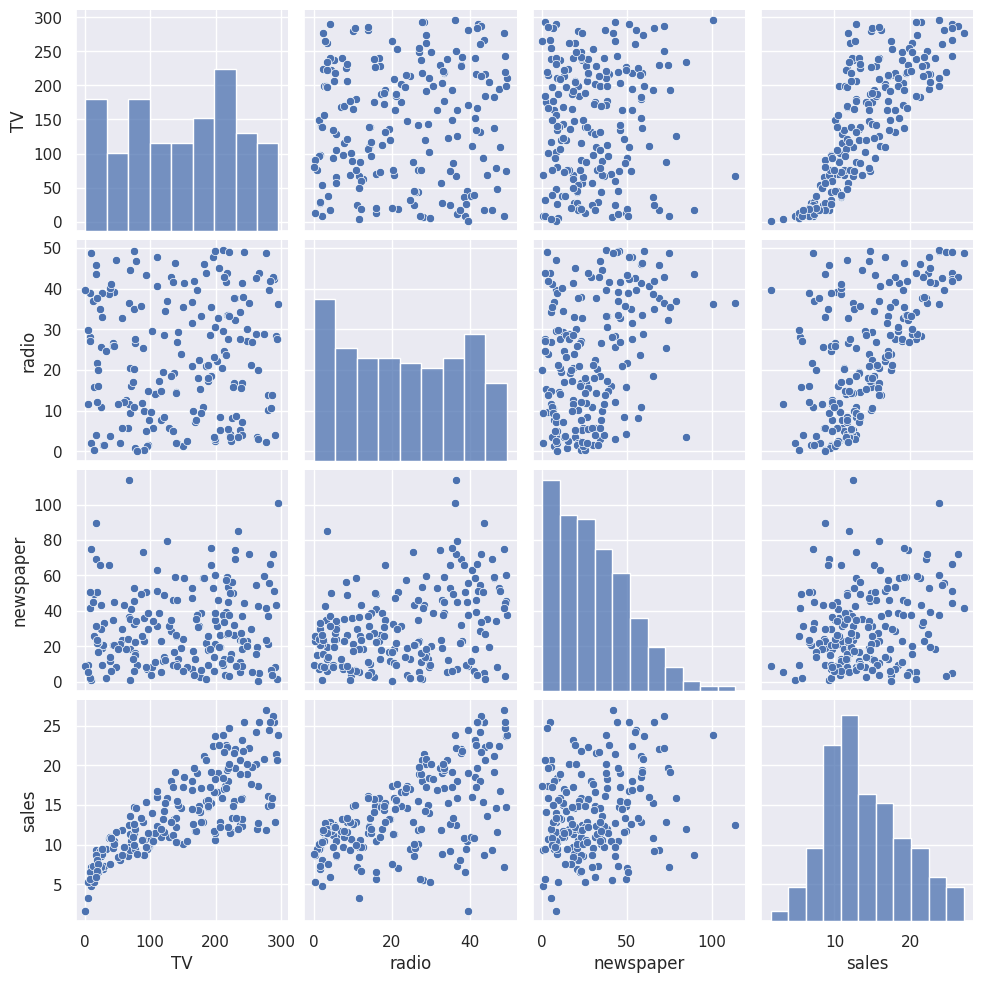

In [6]:
sns.pairplot(df);

The most important panels here are on the bottom row, where `sales` is on the vertical axis and the advertising budgets are on the horizontal axes.

Looking at this row, it appears that TV ad spending and radio ad spending are likely to be useful predictive features for `sales`; for newspaper ad spending, it is not clear from the pairplot whether there is a relationship.


#### Split up data

We will use 70% of the data for training and the remaining 30% to evaluate the regression model on data *not* used for training.

In [7]:
train, test = train_test_split(df, test_size=0.3, random_state=9)

We will set the `random_state` to a constant so that every time you run this notebook, exactly the same data points will be assigned to test vs. training sets. This is helpful in the debugging stage.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 134 to 127
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 85 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


### 1. Fit simple linear regression models

Use the training data to fit a simple linear regression to predict product sales, for each of three features: TV ad budget, radio ad budget, and newspaper ad budget. In other words, you will fit *three* regression models, with each model being trained on one feature. For each of the three regression models, create a plot of the training data and the regression line, with product sales ($y$) on the vertical axis and the feature on which the model was trained ($x$) on the horizontal axis.

Also, for each regression model, print the intercept and coefficients, and compute the MSE and R2 on the training data, and MSE and R2 on the test data.

Comment on the results. Which type of ad spending seems to be associated with the largest increase in product sales? Which regression model is most effective at predicting product sales?

**The code in this section is provided for you**. However, you will need to add comments, observations, and answers to the questions.

#### Fit a simple linear regression

In [10]:
reg_tv    = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news  = LinearRegression().fit(train[['newspaper']], train['sales'])

#### Look at coefficients

In [11]:
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

TV       :  0.04964468781898984 6.711432632336138
Radio    :  0.21062312839115208 8.997640913704718
Newspaper:  0.046574464282301664 12.375549417451523


#### Plot data and regression line

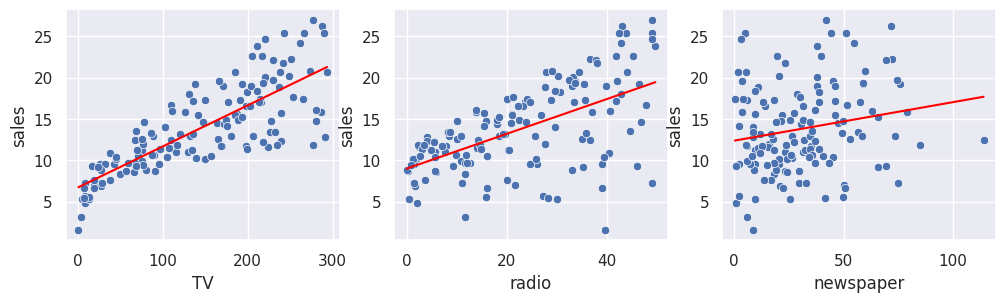

In [12]:
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales");
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales");
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales");
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#### Compute R2, MSE for simple regression

In [13]:
y_pred_tr_tv    = reg_tv.predict(train[['TV']])
y_pred_tr_radio = reg_radio.predict(train[['radio']])
y_pred_tr_news  = reg_news.predict(train[['newspaper']])

In [14]:
r2_tr_tv    = metrics.r2_score(train['sales'], y_pred_tr_tv)
r2_tr_radio = metrics.r2_score(train['sales'], y_pred_tr_radio)
r2_tr_news  = metrics.r2_score(train['sales'], y_pred_tr_news)
print("TV       : ", r2_tr_tv)
print("Radio    : ", r2_tr_radio)
print("Newspaper: ", r2_tr_news)

TV       :  0.6462575775839753
Radio    :  0.33630082549935214
Newspaper:  0.0373981756207491


In [15]:
mse_tr_tv    = metrics.mean_squared_error(train['sales'], y_pred_tr_tv)
mse_tr_radio = metrics.mean_squared_error(train['sales'], y_pred_tr_radio)
mse_tr_news  = metrics.mean_squared_error(train['sales'], y_pred_tr_news)
print("TV       : ", mse_tr_tv)
print("Radio    : ", mse_tr_radio)
print("Newspaper: ", mse_tr_news)

TV       :  9.798510609335318
Radio    :  18.384177273212142
Newspaper:  26.663650133692155


In [16]:
y_pred_ts_tv    = reg_tv.predict(test[['TV']])
y_pred_ts_radio = reg_radio.predict(test[['radio']])
y_pred_ts_news  = reg_news.predict(test[['newspaper']])

In [17]:
r2_ts_tv    = metrics.r2_score(test['sales'], y_pred_ts_tv)
r2_ts_radio = metrics.r2_score(test['sales'], y_pred_ts_radio)
r2_ts_news  = metrics.r2_score(test['sales'], y_pred_ts_news)
print("TV       : ", r2_ts_tv)
print("Radio    : ", r2_ts_radio)
print("Newspaper: ", r2_ts_news)

# TV       :  0.5138892470208256 <-
# Radio    :  0.3072356147167632
# Newspaper:  0.06497948830922318

# der R2-Score beschreibt, wie viel der Varianz von “sales” durch das Model erklärt wird (je größer, desto besser):
# 0.51 → Das Modell mit TV Budget erklärt etwa 51% der Unterschiede in Verkaufszahlen im test-Set
# 0.05 → Das Modell mit gibt nahezu keine erklärbare Beziehung

TV       :  0.5138892470208256
Radio    :  0.3072356147167632
Newspaper:  0.06497948830922318


In [18]:
mse_ts_tv    = metrics.mean_squared_error(test['sales'], y_pred_ts_tv)
mse_ts_radio = metrics.mean_squared_error(test['sales'], y_pred_ts_radio)
mse_ts_news  = metrics.mean_squared_error(test['sales'], y_pred_ts_news)
print("TV       : ", mse_ts_tv)
print("Radio    : ", mse_ts_radio)
print("Newspaper: ", mse_ts_news)

# TV       :  12.288041294264643 <-
# Radio    :  17.511888641395615
# Newspaper:  23.635705625160178

# TV hat den geringste MSE, Newspaper den höchsten → Newspaper liefert keinen praktisch erklärenden Nutzen; Radio hilft ein wenig

# Comment on the results.
# 1. Which type of ad spending seems to be associated with the largest increase in product sales?
# TV
# 2. Which regression model is most effective at predicting product sales?
# TV

TV       :  12.288041294264643
Radio    :  17.511888641395615
Newspaper:  23.635705625160178


### 2. Explore the residuals for the single linear regression models

We know that computing MSE or R2 is not sufficient to diagnose a problem with a linear regression.

Create some additional plots as described below to help you identify any problems with the regression. Use training data for all of the items below.

For each of the three regression models, you will compute the residuals ($y - \hat{y}$). Then, you’ll create three plots - each with three subplots, one for each regression model - as follows:

**Plot 1**: Create a scatter plot of predicted sales ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Make sure both axes use the same scale (the range of the vertical axis should be the same as the range of the horizontal axis) *and* that all three subplots use the same scale. Label each axes, and each plot. What would you expect this plot to look like for a model that explains the data well?

**Plot 2**: Create a scatter plot with the residuals ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Use the same scale for all three subplots. Comment on your observations. Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to actual sales?

**Plot 3**: For each of the three regression models AND each of the three features, create a scatter plot with the residuals ($y - \hat{y}$) on the vertical axis, and the feature ($x$) on the horizontal axis. This plot will include nine subplots in total, for every combination of regression model and feature. Make sure to clearly label each axis, and also label each subplot with a title that indicates which regression model it uses. Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to each of the three features?

**The code in this section is not provided for you**. You will need to write code, as well as comments, observations, and answers to the questions.

------------------------------------------------------------------------

Criteria for the plots:

-   Must be readable (especially text size).
-   Have a label on each axis.
-   Have an appropriate range for each axis. When there are multiple subplots, if the goal is to compare similar things in different subplots, in most cases it is appropriate for them all to use the same range.
-   If there are multiple subplots, or multiple data series in the same plot, it must be made clear which is which.

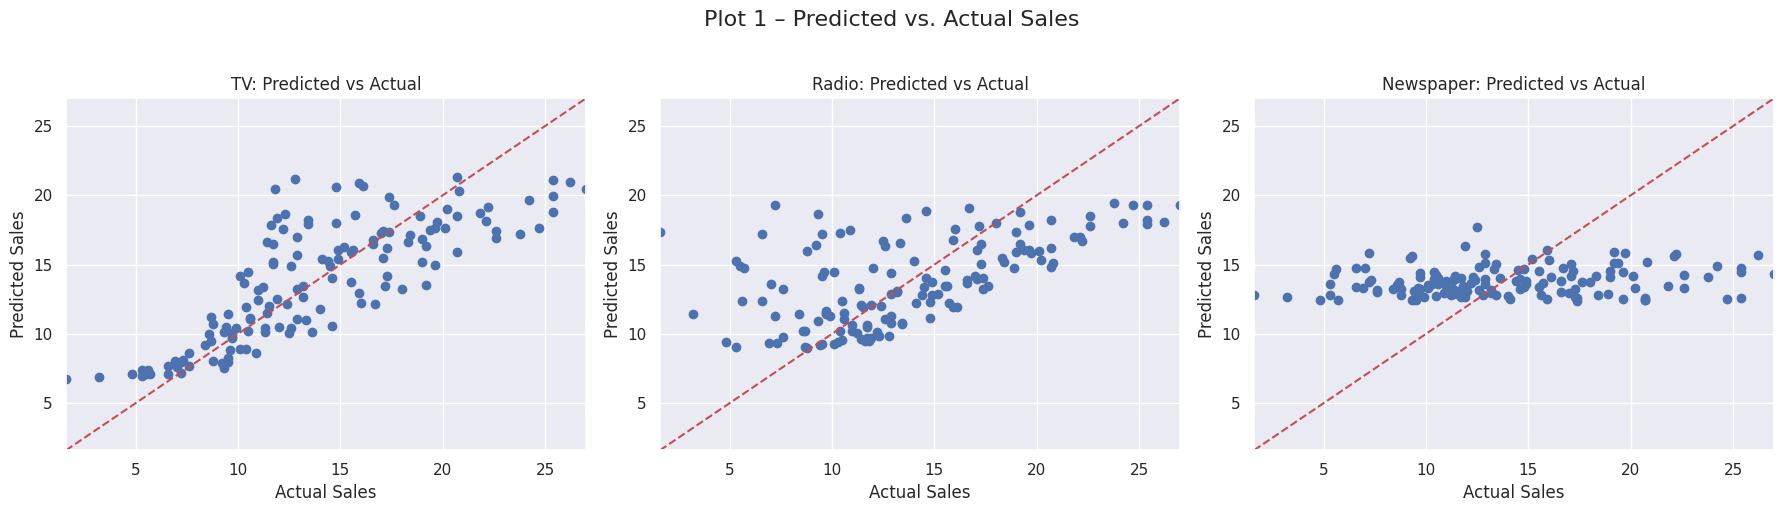

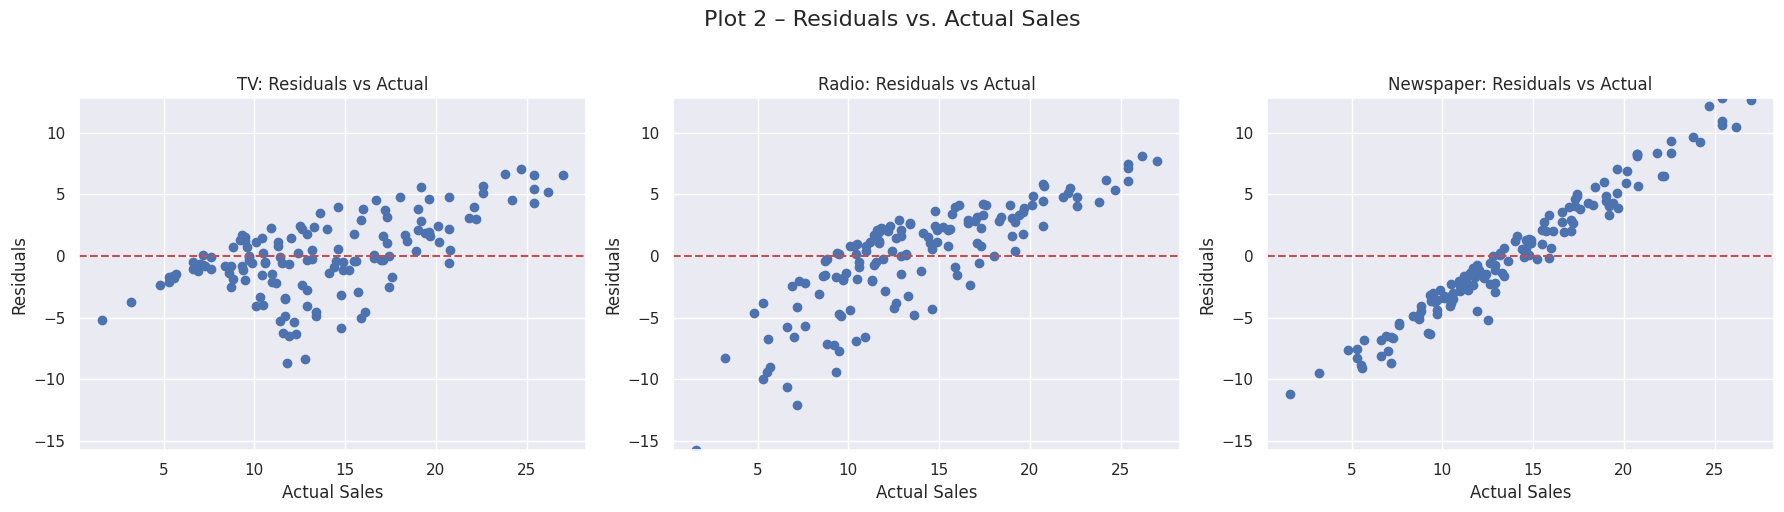

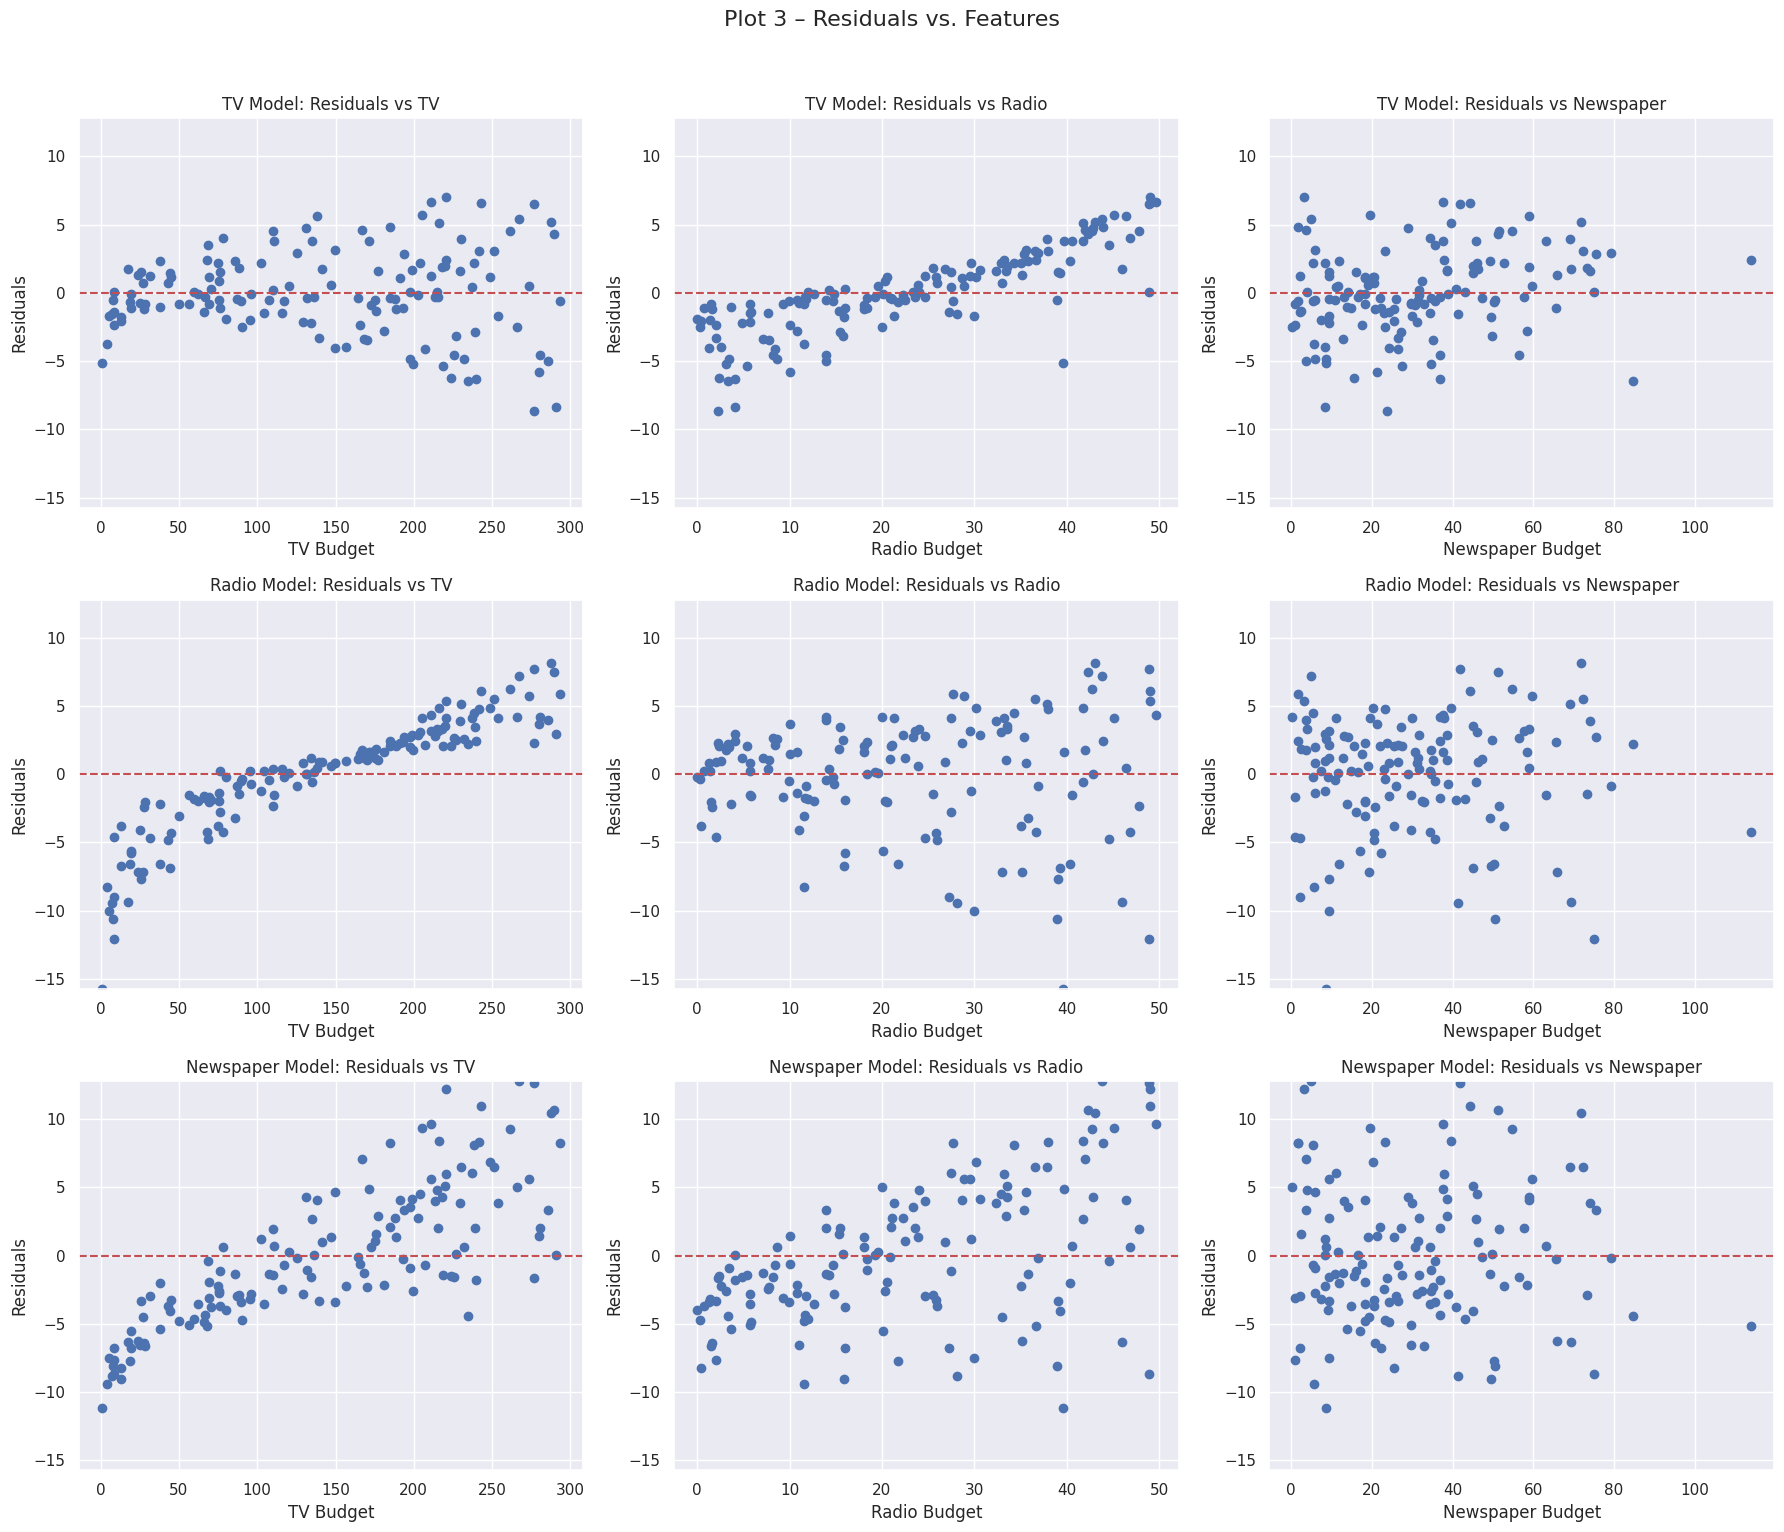

In [23]:
# Train-test split
train, test = train_test_split(df, test_size=0.3, random_state=9)

# Features & Target definieren
X_train_tv = train[['TV']]
X_train_radio = train[['radio']]
X_train_newspaper = train[['newspaper']]
y_train = train['sales']

# Modelle fitten
reg_tv = LinearRegression().fit(X_train_tv, y_train)
reg_radio = LinearRegression().fit(X_train_radio, y_train)
reg_news = LinearRegression().fit(X_train_newspaper, y_train)

# Vorhersagen
y_pred_tr_tv = reg_tv.predict(X_train_tv)
y_pred_tr_radio = reg_radio.predict(X_train_radio)
y_pred_tr_news = reg_news.predict(X_train_newspaper)

# Residuals berechnen
residuals_tr_tv = y_train - y_pred_tr_tv
residuals_tr_radio = y_train - y_pred_tr_radio
residuals_tr_news = y_train - y_pred_tr_news

# Gemeinsame Achsenskalen bestimmen
y_min, y_max = y_train.min(), y_train.max()
res_min = min(residuals_tr_tv.min(), residuals_tr_radio.min(), residuals_tr_news.min())
res_max = max(residuals_tr_tv.max(), residuals_tr_radio.max(), residuals_tr_news.max())

################################################################################################

# Plot 1 - Predicted vs. Actual
# Bei einem gutem Modell liegen die Punkte eng an der Diagonalen
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Plot 1 – Predicted vs. Actual Sales", fontsize=16, y=1.02)

models = [('TV', y_pred_tr_tv), ('Radio', y_pred_tr_radio), ('Newspaper', y_pred_tr_news)]

for ax, (name, preds) in zip(axes, models):
    ax.scatter(y_train, preds)
    ax.plot([y_min, y_max], [y_min, y_max], 'r--')  # perfekte Vorhersagelinie
    ax.set_xlim(y_min, y_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'{name}: Predicted vs Actual')
    ax.set_xlabel('Actual Sales')
    ax.set_ylabel('Predicted Sales')

plt.tight_layout()
plt.show();

################################################################################################

# Plot 2 - Residuals vs. Actual Sales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Plot 2 – Residuals vs. Actual Sales", fontsize=16, y=1.02)

for ax, (name, res) in zip(axes, models):
    ax.scatter(y_train, y_train - res)
    ax.axhline(0, color='r', linestyle='--')
    ax.set_ylim(res_min, res_max)
    ax.set_title(f'{name}: Residuals vs Actual')
    ax.set_xlabel('Actual Sales')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show();

################################################################################################

# Plot 3 - Residuals vs. Features (9 Subplots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Plot 3 – Residuals vs. Features", fontsize=16, y=1.02)

features = [('TV', X_train_tv), ('Radio', X_train_radio), ('Newspaper', X_train_newspaper)]
residual_sets = [('TV Model', residuals_tr_tv),
                 ('Radio Model', residuals_tr_radio),
                 ('Newspaper Model', residuals_tr_news)]

for row, (model_name, res) in enumerate(residual_sets):
    for col, (feat_name, feat_values) in enumerate(features):
        ax = axes[row, col]
        ax.scatter(feat_values, res)
        ax.axhline(0, color='r', linestyle='--')
        ax.set_title(f'{model_name}: Residuals vs {feat_name}')
        ax.set_xlabel(f'{feat_name} Budget')
        ax.set_ylabel('Residuals')
        ax.set_ylim(res_min, res_max)

plt.tight_layout()
plt.show();

**Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to each of the three features?**

die meisten zeigen keine klare Struktur

überwiegend kein systematisches Muster, aber Hinweise darauf, dass mehrere Features gemeinsam nötig sind, um Verkäufe sinnvoll zu erklären.

- Beim **TV-Modell gegen TV-Budget ⇒** streuen die Residuen relativ gleichmäßig
- **Beim TV-Modell gegen Radio-Budget ⇒** wirkt die Streuung systematischer. Das deutet darauf hin, dass Radio zusätzlichen Erklärungsbeitrag liefert, aber im Modell fehlt.
- **Beim** **Radio-Modell gegen TV-Budget ⇒** sieht man ein ähnliches Muster – TV beeinflusst Sales ebenfalls, wird aber nicht berücksichtigt.
- Beim **Newspaper-Modell ⇒** sind die Residuen breit und zufällig verteilt, was die schwache Beziehung zwischen Newspaper-Budget und Sales bestätigt.

### 3. Try a multiple linear regression

Next, fit a multiple linear regression to predict product sales, using all three features to train a single model: TV ad budget, radio ad budget, and newspaper ad budget.

Print the intercept and coefficients, and compute the MSE and R2 on the training data, and MSE and R2 on the test data. Comment on the results. Make sure to explain any differences between the coefficients of the multiple regression model, and the coefficients of the three simple linear regression models. If they are different, why?

**The code in the first part of this section is provided for you**. However, you will need to add comments, observations, and answers to the questions.

Also repeat the analysis of part (3) for this regression model. Use training data for all of these items:

**Plot 1**: Create a scatter plot of predicted sales ($\hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Make sure both axes use the same scale (the range of the vertical axis should be the same as the range of the horizontal axis). Label each axes. Does this model explain the data more effectively than the simple linear regressions from the previous section?

**Plot 2**: Create a scatter plot with the residuals ($y - \hat{y}$) on the vertical axis, and actual sales ($y$) on the horizontal axis. Comment on your observations. Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to actual sales?

**Plot 3**: For each of the three features, plot the residuals ($y - \hat{y}$) on the vertical axis, and the feature ($x$) on the horizontal axis. Make sure to clearly label each axis. Is there a pattern in the residuals (and if so, what might it indicate), or do they appear to have no pattern with respect to each of the three features?

------------------------------------------------------------------------

Criteria for the plots:

-   Must be readable (especially text size).
-   Have a label on each axis.
-   Have an appropriate range for each axis. When there are multiple subplots, if the goal is to compare similar things in different subplots, in most cases it is appropriate for them all to use the same range.
-   If there are multiple subplots, or multiple data series in the same plot, it must be made clear which is which.

#### Fit a multiple linear regression

In [24]:
reg_multi = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#### Look at coefficients

In [25]:
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)

Coefficients (TV, radio, newspaper): [ 0.04636712  0.18249225 -0.00196151]
Intercept:  3.0762941463550604


#### Compute R2, MSE for multiple regression

In [26]:
y_pred_tr_multi = reg_multi.predict(train[['TV', 'radio', 'newspaper']])

r2_tr_multi  = metrics.r2_score(train['sales'], y_pred_tr_multi)
mse_tr_multi = metrics.mean_squared_error(train['sales'], y_pred_tr_multi)

print("Multiple regression R2:  ", r2_tr_multi)
print("Multiple regression MSE: ", mse_tr_multi)

# Multiple regression R2:   0.8934006397815405 -> erklärt ca. 89%
# Multiple regression MSE:  2.952755722412376


Multiple regression R2:   0.8934006397815405
Multiple regression MSE:  2.952755722412376


In [27]:
y_pred_ts_multi = reg_multi.predict(test[['TV', 'radio', 'newspaper']])

r2_ts_multi  = metrics.r2_score(test['sales'], y_pred_ts_multi)
mse_ts_multi = metrics.mean_squared_error(test['sales'], y_pred_ts_multi)

print("Multiple regression R2:  ", r2_ts_multi)
print("Multiple regression MSE: ", mse_ts_multi)

# Multiple regression R2:   0.9034495005656622 -> erklärt ca. 90%
# Multiple regression MSE:  2.4406300760885373 -> ca. gleich wie bei Trainingsdaten


Multiple regression R2:   0.9034495005656622
Multiple regression MSE:  2.4406300760885373


In [30]:
# Linear Regression Models:
print("Linear Regression Model:")
print("TV       : ", reg_tv.coef_[0], reg_tv.intercept_)
print("Radio    : ", reg_radio.coef_[0], reg_radio.intercept_)
print("Newspaper: ", reg_news.coef_[0], reg_news.intercept_)

# Multiple Regression Model:
print("\nMultiple Regression Model:")
print("Coefficients (TV, radio, newspaper):", reg_multi.coef_)
print("Intercept: ", reg_multi.intercept_)


#Linear Regression Model:
#TV       :  0.04964468781898984 6.711432632336138
#Radio    :  0.21062312839115208 8.997640913704718
#Newspaper:  0.046574464282301664 12.375549417451523

#Multiple Regression Model:
#Coefficients (TV, radio, newspaper): [ 0.04636712  0.18249225 -0.00196151]
#Intercept:  3.0762941463550604

# - TV fällt von 0.049 → 0.046
# - Radio fällt von 0.211 → 0.182
# - Newspaper fällt von 0.047 → -0.001... (~0)

# -> das passiert, weil Werbebudgets teilweise miteinander korrelieren - besonders TV und Radio
# - im multiplen Modell konkurrieren die Variablen um dieselbe erklärte Varianz. Dadurch erhalten TV und Radio realistischere, kleinere Effektschätzungen
# - Newspaper verliert fast vollständig an Bedeutung, weil sein vermeintlicher Effekt in Wahrheit durch TV und Radio erklärt wurde
# - Die Koeffizienten unterscheiden sich, weil das multiple Modell gemeinsame Zusammenhänge berücksichtigt und damit die tatsächlichen, unabhängigen Effekte der Features sichtbar macht.


Linear Regression Model:
TV       :  0.04964468781898984 6.711432632336138
Radio    :  0.21062312839115208 8.997640913704718
Newspaper:  0.046574464282301664 12.375549417451523

Multiple Regression Model:
Coefficients (TV, radio, newspaper): [ 0.04636712  0.18249225 -0.00196151]
Intercept:  3.0762941463550604


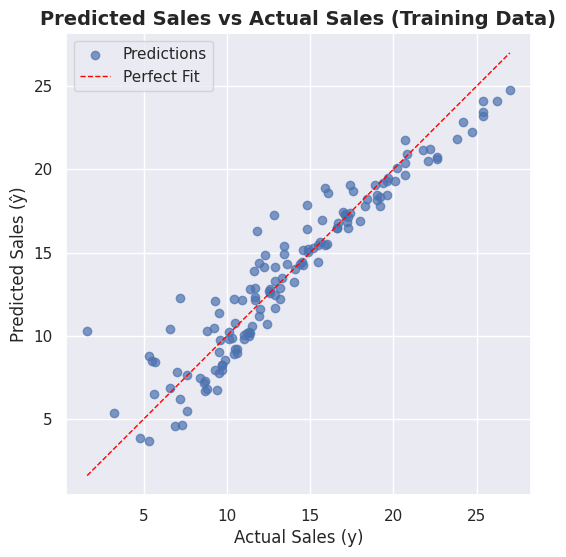

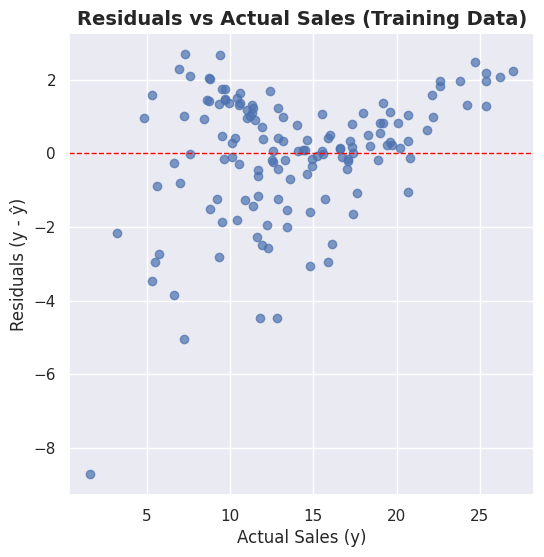

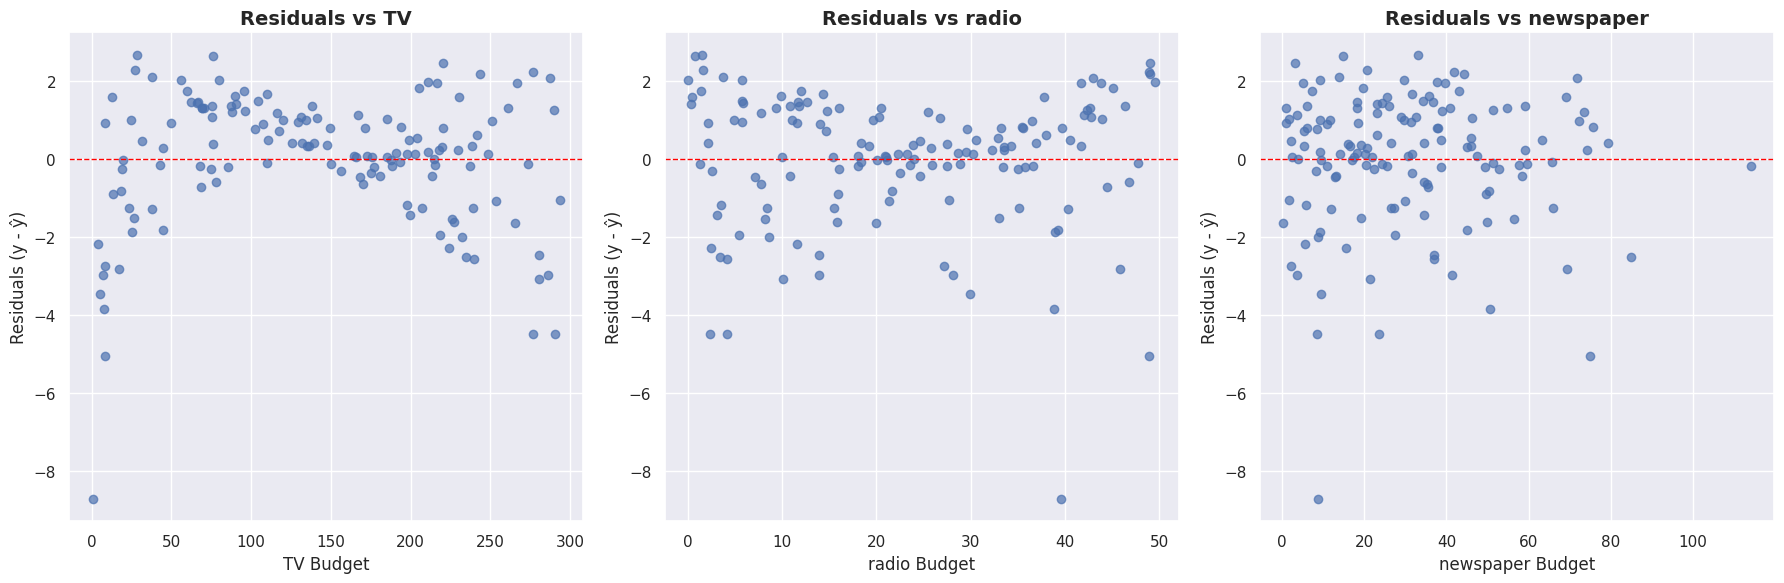

In [36]:
# Plot 1: Vorhergesagte vs. tatsächliche Verkäufe
plt.figure(figsize=(6, 6))

# Scatterplot der Trainingsdaten: tatsächliche Verkäufe (x) vs. vorhergesagte Verkäufe (ŷ)
# Jeder Punkt entspricht einer Beobachtung im Trainingsdatensatz
plt.scatter(train['sales'], y_pred_tr_multi, alpha=0.7, label="Predictions")

# Referenzlinie für perfekte Vorhersagen (y = x)
# Wenn das Modell perfekt wäre, würden alle Punkte genau auf dieser Linie liegen
plt.plot([train['sales'].min(), train['sales'].max()],
         [train['sales'].min(), train['sales'].max()],
         color='red', linestyle='--', linewidth=1, label="Perfect Fit")

# Achsenbeschriftungen und Titel
plt.xlabel("Actual Sales (y)")
plt.ylabel("Predicted Sales (ŷ)")
plt.title("Predicted Sales vs Actual Sales (Training Data)", fontweight='bold', fontsize=14)
plt.legend()

# Beide Achsen bekommen denselben Wertebereich, damit Abweichungen visuell leichter erkennbar sind
plt.axis("equal")

plt.show();

# Der Scatterplot zeigt Punkte, die eng entlang der roten Linie liegen. Das bedeutet:
# Die vorhergesagten Verkaufszahlen stimmen sehr gut mit den tatsächlichen überein.
# Die Punktwolke ist deutlich kompakter als bei den einzelnen linearen Modellen (TV-only, Radio-only, Newspaper-only).

############################################################################################################################################

# Plot 2: Residuals vs. tatsächliche Verkäufe
# Residuals berechnen: tatsächlicher Wert minus Vorhersage
residuals_multi = train['sales'] - y_pred_tr_multi

plt.figure(figsize=(6, 6))

# Scatterplot der Residuals gegenüber den tatsächlichen Verkaufszahlen
# Ziel: mögliche Muster, Verzerrungen oder Heteroskedastizität erkennen
plt.scatter(train['sales'], residuals_multi, alpha=0.7)

# Modellfehler sollten zufällig um diese Linie streuen
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.xlabel("Actual Sales (y)")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residuals vs Actual Sales (Training Data)", fontweight='bold', fontsize=14)

plt.show();

# Die Residuals liegen  verstreut um die Nulllinie, besser als beim vorherigen Beispiel
# -> das bedeutet, dass das Modell linear ist, gut spezifiziert ist und wenig systematische Fehler macht
# Residuals sehen relative zufällig aus → relativ gut

############################################################################################################################################

# Plot 3: Residuals vs. einzelne Features
features = ['TV', 'radio', 'newspaper']
plt.figure(figsize=(18, 6))

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)

    # Jeder Plot prüft, ob ein bestimmtes Feature systematische Fehler verursacht
    plt.scatter(train[feature], residuals_multi, alpha=0.7)

    # Wenn Residuals zufällig um 0 verteilt sind, passt das lineare Modell gut
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

    plt.xlabel(f"{feature} Budget")
    plt.ylabel("Residuals (y - ŷ)")
    plt.title(f"Residuals vs {feature}", fontweight='bold', fontsize=14)

# Optimiert Abstände zwischen Subplots
plt.tight_layout()
plt.show();

### 4. Linear regression with interaction terms

Our multiple linear regression includes additive effects of all three types of advertising media. However, it does not include *interaction* effects, in which combining different types of advertising media together results in a bigger boost in sales than just the additive effect of the individual media.

The pattern in the residuals plots from parts (1) through (3) suggest that a model including an interaction effect may explain sales data better than a model including additive effects. Add four columns to each data frame (`train` and `test`):

-   `newspaper` $\times$ `radio` (name this column `newspaper_radio`)
-   `TV` $\times$ `radio` (name this column `TV_radio`)
-   `newspaper` $\times$ `TV` (name this column `newspaper_TV`)
-   `newspaper` $\times$ `radio` $\times$ `TV` (name this column `newspaper_radio_TV`)

Note: you can use the `assign` function in `pandas` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)) to create a new column and assign a value to it using operations on other columns.

Then, train a linear regression model on all seven features: the three types of ad budgets, and the four interaction effects. Repeat the analysis of part (3) for the model including interaction effects. Are the interaction effects helpful for explaining the effect of ads on product sales? Are there any patterns evident in the residual plots that suggest further opportunities for improving the model?

**The code in this section is not provided for you**. You will need to write code, in addition to comments, observations, and answers to the questions.

------------------------------------------------------------------------

Criteria for the plots:

-   Must be readable (especially text size).
-   Have a label on each axis.
-   Have an appropriate range for each axis. When there are multiple subplots, if the goal is to compare similar things in different subplots, in most cases it is appropriate for them all to use the same range.
-   If there are multiple subplots, or multiple data series in the same plot, it must be made clear which is which.

        TV  radio  newspaper  sales  newspaper_radio  TV_radio  newspaper_TV  \
134  219.8   33.5       45.1   19.6          1510.85   7363.30       9912.98   
137   25.6   39.0        9.3    9.5           362.70    998.40        238.08   
155  187.8   21.1        9.5   15.6           200.45   3962.58       1784.10   
178  170.2    7.8       35.2   11.7           274.56   1327.56       5991.04   
69   237.4   27.5       11.0   18.9           302.50   6528.50       2611.40   

     newspaper_radio_TV  
134          332084.830  
137            9285.120  
155           37644.510  
178           46730.112  
69            71813.500  
Coefficients (TV, radio, newspaper, interactions): [ 2.07581277e-02  1.19519832e-02  2.03755245e-02 -2.46384818e-05
  1.18859985e-03 -8.06743937e-05 -7.25626214e-07]
Intercept:  6.378007972477893
Interaction Model Training R2: 0.9639737928022052
Interaction Model Training MSE: 0.997910205484344
Interaction Model Test R2: 0.978290346306146
Interaction Model Test

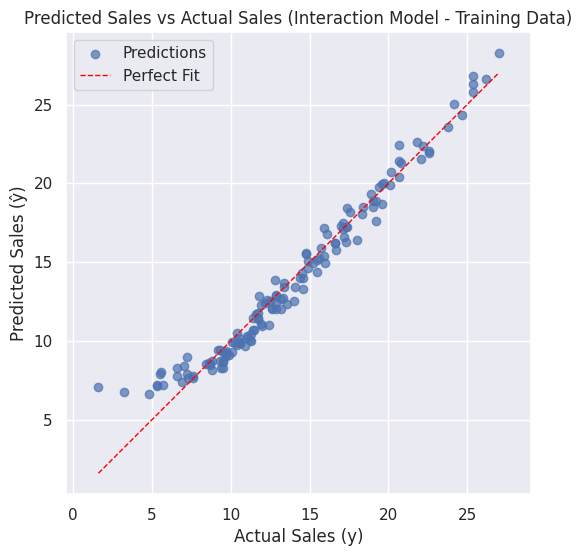

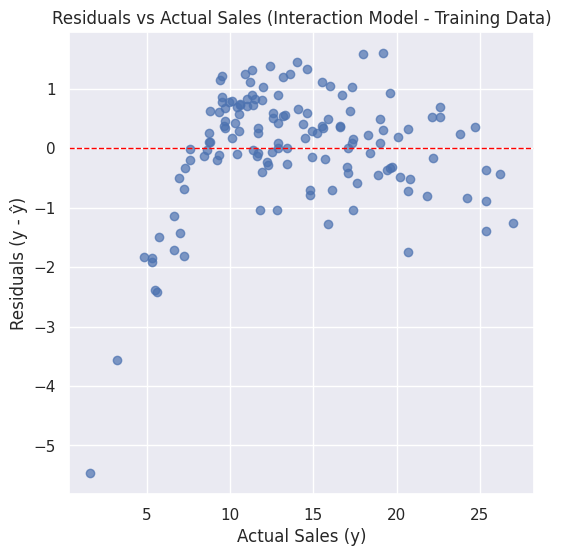

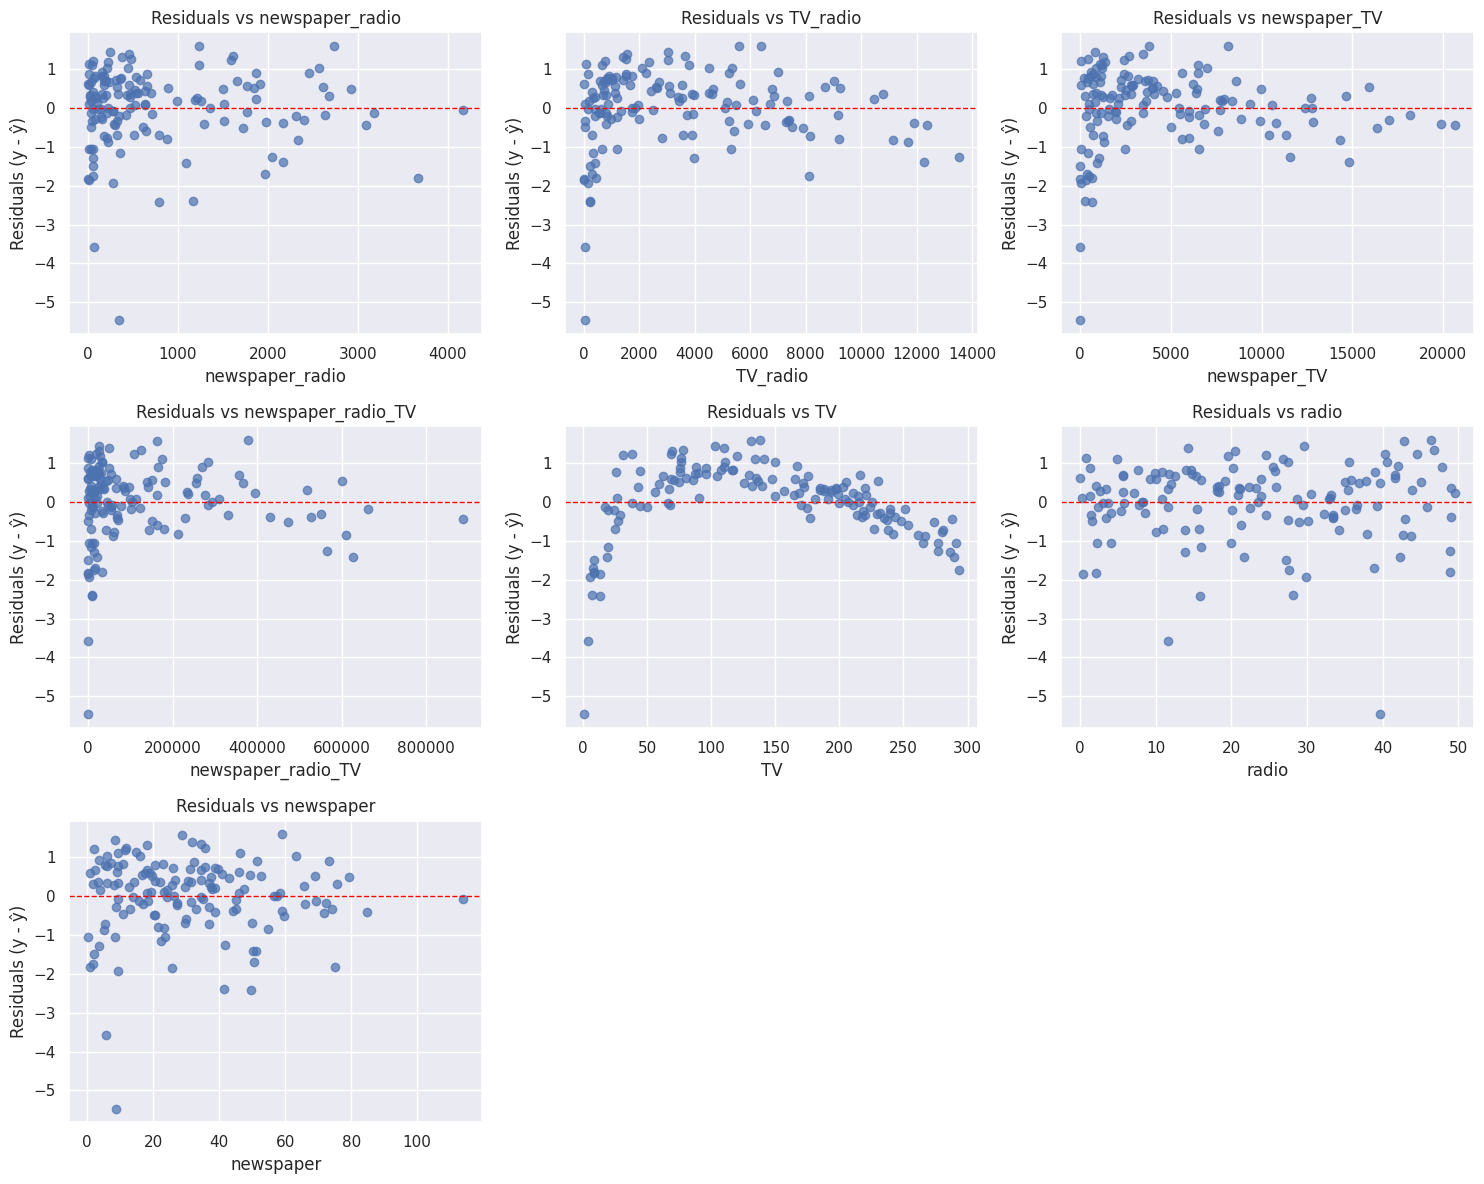

In [41]:

# 1. Interaktionseffekte erstellen

# es werden neue Spalten erstellt, die die Interkationen zw. den Werbebudgets darstellen
# Ziel ist es, zu Prüfen, ob Kombinationen von Werbemitteln einen stärkeren Einfluss auf Verkäufe haben.
train = train.assign(
    newspaper_radio=train['newspaper'] * train['radio'],          # Zeitung x Radio
    TV_radio=train['TV'] * train['radio'],                        # TV x Radio
    newspaper_TV=train['newspaper'] * train['TV'],                # Zeitung x TV
    newspaper_radio_TV=train['newspaper'] * train['radio'] * train['TV']  # dreifache Interaktion
)

test = test.assign(
    newspaper_radio=test['newspaper'] * test['radio'],
    TV_radio=test['TV'] * test['radio'],
    newspaper_TV=test['newspaper'] * test['TV'],
    newspaper_radio_TV=test['newspaper'] * test['radio'] * test['TV']
)

# Anzeige der ersten Zeilen, um zu prüfen, dass die neuen Spalten korrekt erstellt wurden
print(train.head())


# 2. Lineares Regressionsmodell mit Interaktionen trainieren

features = ['TV', 'radio', 'newspaper', 'newspaper_radio', 'TV_radio', 'newspaper_TV', 'newspaper_radio_TV']

# Training des Modells mit allen 7 Features
reg_interact = LinearRegression().fit(train[features], train['sales'])

# Ausgabe der Koeffizienten und des Intercepts
# Positive Koeffizienten zeigen, dass ein Feature den Umsatz steigert, negative Koeffizienten reduzieren ihn
print("Coefficients (TV, radio, newspaper, interactions):", reg_interact.coef_)
print("Intercept: ", reg_interact.intercept_)


# 3. Modellleistung auf Trainingsdaten prüfen
y_pred_tr_interact = reg_interact.predict(train[features])

# R2: Anteil der durch das Modell erklärten Varianz
r2_tr_interact = metrics.r2_score(train['sales'], y_pred_tr_interact)

# MSE: durchschnittlicher quadratischer Fehler der Vorhersagen
mse_tr_interact = metrics.mean_squared_error(train['sales'], y_pred_tr_interact)

print("Interaction Model Training R2:", r2_tr_interact)
print("Interaction Model Training MSE:", mse_tr_interact)


# 4. Modellleistung auf Testdaten prüfen
y_pred_ts_interact = reg_interact.predict(test[features])

r2_ts_interact = metrics.r2_score(test['sales'], y_pred_ts_interact)
mse_ts_interact = metrics.mean_squared_error(test['sales'], y_pred_ts_interact)

print("Interaction Model Test R2:", r2_ts_interact)
print("Interaction Model Test MSE:", mse_ts_interact)


# 5. Plot 1: Vorhergesagte vs. tatsächliche Verkäufe (Training)
plt.figure(figsize=(6, 6))
plt.scatter(train['sales'], y_pred_tr_interact, alpha=0.7, label="Predictions")

# Linie für perfekte Vorhersage
plt.plot([train['sales'].min(), train['sales'].max()],
         [train['sales'].min(), train['sales'].max()],
         color='red', linestyle='--', linewidth=1, label="Perfect Fit")
plt.xlabel("Actual Sales (y)")
plt.ylabel("Predicted Sales (ŷ)")
plt.title("Predicted Sales vs Actual Sales (Interaction Model - Training Data)")
plt.legend()
plt.axis("equal")  # gleiche Skala für beide Achsen
plt.show();


# 6. Plot 2: Residuals vs. tatsächliche Verkäufe (Training)
residuals_interact = train['sales'] - y_pred_tr_interact

plt.figure(figsize=(6, 6))
plt.scatter(train['sales'], residuals_interact, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Null-Linie für Residuals
plt.xlabel("Actual Sales (y)")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residuals vs Actual Sales (Interaction Model - Training Data)")
plt.show();


# 7. Plot 3: Residuals vs. jedes Feature (einschließlich Interaktionen)
features_with_interactions = ['newspaper_radio', 'TV_radio', 'newspaper_TV', 'newspaper_radio_TV', 'TV', 'radio', 'newspaper']
num_features = len(features_with_interactions)

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_with_interactions):
    plt.subplot(3, 3, i + 1)
    plt.scatter(train[feature], residuals_interact, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Null-Linie für Residuals
    plt.xlabel(feature)
    plt.ylabel("Residuals (y - ŷ)")
    plt.title(f"Residuals vs {feature}")
    plt.grid(True)

plt.tight_layout()
plt.show();

# - Plot 1 zeigt, wie gut das Modell die tatsächlichen Verkäufe vorhersagt.
#   Je näher die Punkte an der roten Linie liegen, desto besser.
# - Plot 2 zeigt Residuals vs. tatsächliche Verkäufe. Wenn die Punkte zufällig um 0 verteilt sind, passt das Modell gut.
# - Plot 3 prüft Residuals gegen jedes Feature. Kein erkennbares Muster bedeutet, dass die Interaktionen sinnvoll sind und keine wichtigen Zusammenhänge fehlen.


**Are the interaction effects helpful for explaining the effect of ads on product sales?**

ja, die Interaktionseffekte verbessern deutlich

- R2 auf den Trainingsdaten steigt von **~0.89** (ohne Interaktionen) auf **~0.96**.
- R2 auf den Testdaten steigt von **~0.90** auf **~0.98**.
- MSE sinkt stark, sowohl auf Training als auch Test. -> sagt allerdings nicht sehr viel aus, da man die Skalierung nicht einschätzen kann

Kombinationen von Werbemitteln (z. B. TV x Radio) haben einen zusätzlichen Effekt auf den Umsatz, der nicht durch die einzelnen Medien alleine erklärt werden kann.

**Are there any patterns evident in the residual plots that suggest further opportunities for improving the model?**

- Die Residuen sind nun gleichmäßiger um 0 verteilt, ohne erkennbare Muster.
- In den einzelnen Feature-Residualplots (einschließlich der Interaktionen) sieht man keine systematischen Abhängigkeiten.
- Das deutet darauf hin, dass das Modell die wichtigsten Zusammenhänge zwischen Werbebudget und Verkäufen erfasst.